In [76]:
import pandas as pd
import numpy as np
%matplotlib inline

In [77]:
import warnings
warnings.filterwarnings('ignore')

In [78]:
from statsmodels.tsa.arima_model import ARMA, ARIMA, ARMAResults, ARIMAResults

In [79]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [80]:
from pmdarima import auto_arima

In [81]:
df1 = pd.read_csv('./Data Files/DailyTotalFemaleBirths.csv', index_col='Date', parse_dates=True)
df1.index.freq = 'D'
df1 = df1[:120]

In [82]:
df2 = pd.read_csv('./Data Files/TradeInventories.csv', index_col='Date', parse_dates=True)
df2.index.freq = 'MS'

# ARMA

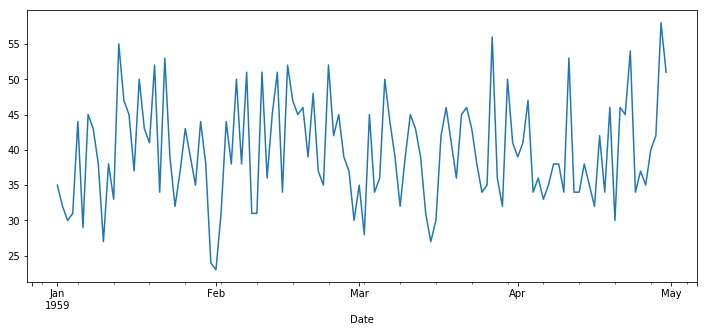

In [13]:
df1['Births'].plot(figsize=(12,5));

In [16]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [17]:
adf_test(df1['Births'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -9.855384e+00
p-value                 4.373545e-17
# lags used             0.000000e+00
# observations          1.190000e+02
critical value (1%)    -3.486535e+00
critical value (5%)    -2.886151e+00
critical value (10%)   -2.579896e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [18]:
auto_arima(df1['Births'], seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  120
Model:                        SARIMAX   Log Likelihood                -409.745
Date:                Thu, 26 Dec 2019   AIC                            823.489
Time:                        16:52:00   BIC                            829.064
Sample:                             0   HQIC                           825.753
                                - 120                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.7833      0.687     57.896      0.000      38.437      41.130
sigma2        54.1197      8.319      6.506      0.000      37.815      70.424
===================================================================================
Ljung-Box (Q):                       44.41   Jarque-Bera (JB):                 2.69
Prob(Q):                              0.29   Prob(JB):                         0.26
Heteroskedasticity (H):               0.80   Skew:                             0.26
Prob(H) (two-sided):                  0.48   Kurtosis:                         2.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
train = df1.iloc[:90]
test = df1.iloc[90:]

In [24]:
model = ARMA(train['Births'], order=(2,2))

In [25]:
results = model.fit()

In [26]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 Births   No. Observations:                   90
Model:                     ARMA(2, 2)   Log Likelihood                -307.905
Method:                       css-mle   S.D. of innovations              7.405
Date:                Thu, 26 Dec 2019   AIC                            627.809
Time:                        16:57:34   BIC                            642.808
Sample:                    01-01-1959   HQIC                           633.858
                         - 03-31-1959                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           39.7549      0.912     43.607      0.000      37.968      41.542
ar.L1.Births    -0.1850      1.087     -0.170      0.865      -2.315       1.945
ar.L2.Births     0.4352      0.644      0.675      0.501      -0.828       1.698
ma.L1.Births     0.2777      1.097      0.253      0.801      -1.872       2.427
ma.L2.Births    -0.3999      0.679     -0.589      0.557      -1.730       0.930
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.3181           +0.0000j            1.3181            0.5000
AR.2            1.7434           +0.0000j            1.7434            0.0000
MA.1           -1.2718           +0.0000j            1.2718            0.5000
MA.2            1.9662           +0.0000j            1.9662            0.0000
-----------------------------------------------------------------------------
"""

In [27]:
start = len(train)
end = len(train) + len(test) - 1

In [28]:
predictions = results.predict(start, end).rename('ARMA(2,2) Predictions')

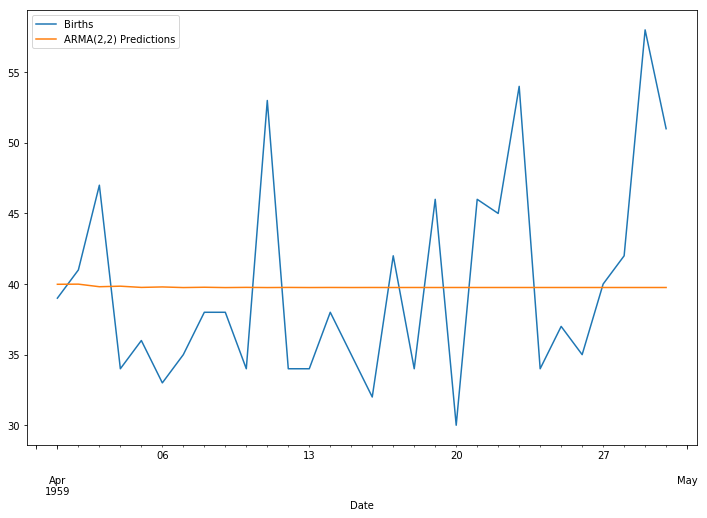

In [29]:
test['Births'].plot(figsize=(12,8), legend=True)
predictions.plot(legend=True)

In [30]:
test.mean()

Births    39.833333
dtype: float64

In [31]:
predictions.mean()

39.777427822039044

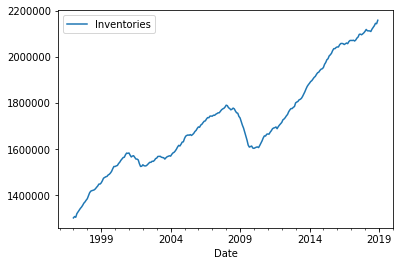

In [32]:
df2.plot()

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose

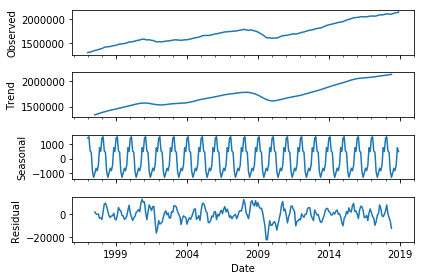

In [63]:
result = seasonal_decompose(df2['Inventories'], model='add')
result.plot();

In [87]:
auto_arima(df2['Inventories'], seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  264
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2672.018
Date:                Thu, 26 Dec 2019   AIC                           5348.037
Time:                        18:03:42   BIC                           5355.181
Sample:                             0   HQIC                          5350.908
                                - 264                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3258.3802    470.991      6.918      0.000    2335.255    4181.506
sigma2       3.91e+07   2.95e+06     13.250      0.000    3.33e+07    4.49e+07
===================================================================================
Ljung-Box (Q):                      455.75   Jarque-Bera (JB):               100.74
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -1.15
Prob(H) (two-sided):                  0.48   Kurtosis:                         4.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [89]:
from statsmodels.tsa.statespace.tools import diff

In [90]:
df2['Diff_1'] = diff(df2['Inventories'], k_diff=1)

In [91]:
adf_test(df2['Diff_1'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -3.412249
p-value                   0.010548
# lags used               4.000000
# observations          258.000000
critical value (1%)      -3.455953
critical value (5%)      -2.872809
critical value (10%)     -2.572775
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


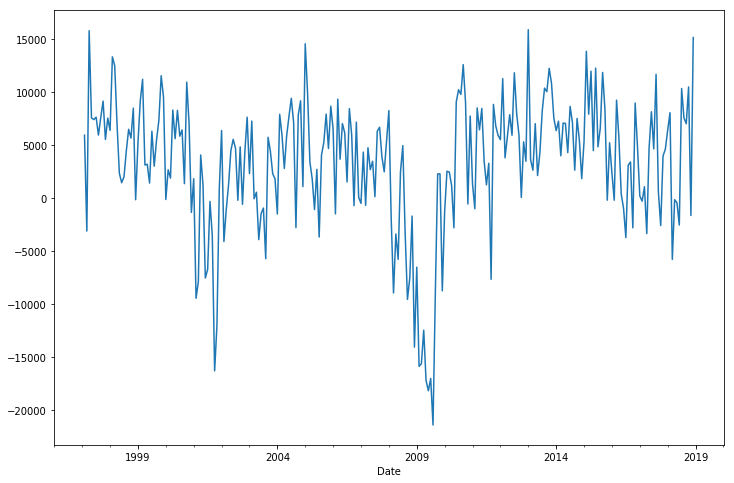

In [92]:
df2['Diff_1'].plot(figsize=(12,8))

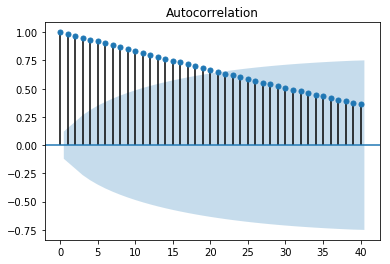

In [94]:
plot_acf(df2['Inventories'], lags=40);

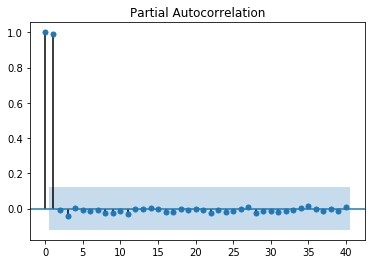

In [95]:
plot_pacf(df2['Inventories'], lags=40);

In [97]:
stepwise_fit = auto_arima(df2['Inventories'], start_p=0, start_q=0, max_p=2 ,max_q=2, 
                          seasonal=False, trace=True)

stepwise_fit.summary()

Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 0); AIC=5348.037, BIC=5355.181, Fit time=0.008 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 0); AIC=5399.843, BIC=5410.560, Fit time=0.026 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 0); AIC=5350.241, BIC=5360.957, Fit time=0.033 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 0); AIC=5409.217, BIC=5412.789, Fit time=0.005 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 0); AIC=5378.835, BIC=5393.124, Fit time=0.106 seconds
Total fit time: 0.178 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  264
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2672.018
Date:                Thu, 26 Dec 2019   AIC                           5348.037
Time:                        18:19:06   BIC                           5355.181
Sample:                             0   HQIC                          5350.908
                                - 264                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3258.3802    470.991      6.918      0.000    2335.255    4181.506
sigma2       3.91e+07   2.95e+06     13.250      0.000    3.33e+07    4.49e+07
===================================================================================
Ljung-Box (Q):                      455.75   Jarque-Bera (JB):               100.74
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -1.15
Prob(H) (two-sided):                  0.48   Kurtosis:                         4.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [98]:
train = df2.iloc[:252]
test = df2.iloc[252:]

In [99]:
model = ARIMA(train['Inventories'], order=(1,1,1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.Inventories   No. Observations:                  251
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2486.394
Method:                       css-mle   S.D. of innovations           4845.008
Date:                Thu, 26 Dec 2019   AIC                           4980.788
Time:                        18:22:21   BIC                           4994.890
Sample:                    02-01-1997   HQIC                          4986.463
                         - 12-01-2017                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3233.7679   1344.917      2.404      0.017     597.779    5869.757
ar.L1.D.Inventories     0.9026      0.039     23.012      0.000       0.826       0.979
ma.L1.D.Inventories    -0.5581      0.079     -7.048      0.000      -0.713      -0.403
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1080           +0.0000j            1.1080            0.0000
MA.1            1.7918           +0.0000j            1.7918            0.0000
-----------------------------------------------------------------------------
"""

In [100]:
start = len(train)
end = len(train) + len(test) - 1 

predictions = results.predict(start=start, end=end, typ='levels').rename('ARIMA(1,1,1) Predictions')

In [101]:
predictions.head()

2018-01-01    2.107156e+06
2018-02-01    2.110545e+06
2018-03-01    2.113918e+06
2018-04-01    2.117278e+06
2018-05-01    2.120626e+06
Freq: MS, Name: ARIMA(1,1,1) Predictions, dtype: float64

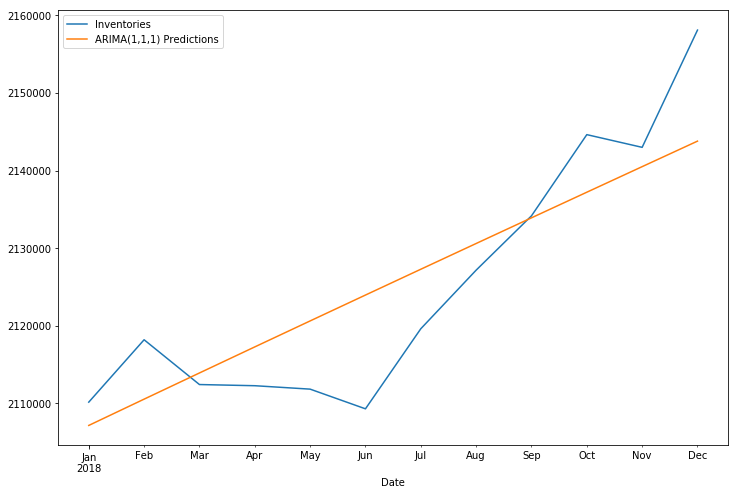

In [103]:
test['Inventories'].plot(figsize=(12,8), legend=True);
predictions.plot(legend=True)

In [104]:
from statsmodels.tools.eval_measures import rmse

In [105]:
error = rmse(test['Inventories'], predictions)

In [106]:
error

7767.490043111326

In [107]:
test['Inventories'].mean()

2125075.6666666665

In [108]:
%%markdown
# FORECAST INTO THE UNKOWN FUTURE

# FORECAST INTO THE UNKOWN FUTURE

In [109]:
model = ARIMA(df2['Inventories'], order=(1,1,1))

In [110]:
results = model.fit()

In [111]:
fcast = results.predict(start=len(df2), end=len(df2)+11, typ='levels').rename('ARIMA (1,1,1) Forecast')

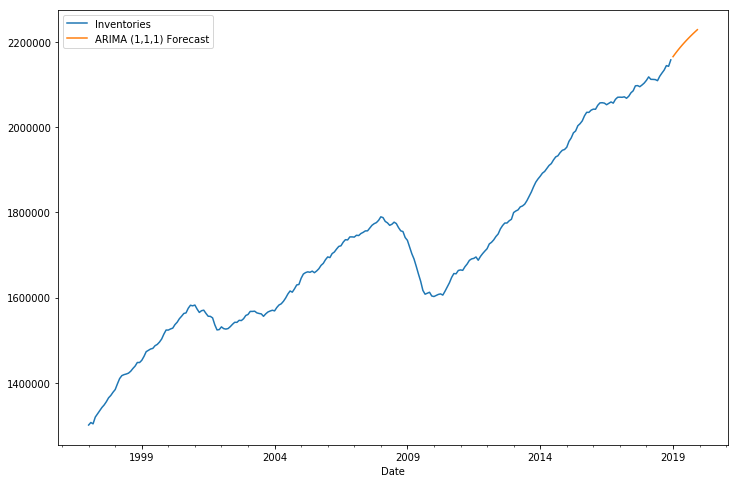

In [114]:
df2['Inventories'].plot(figsize=(12,8), legend=True)
fcast.plot(legend=True)